# Comparing Networks

In this notebook, we want to compare different network to each other.
This one focuses on...

- Trained Model (**Simple Gradient Ascent Unlearning**)*$^1$

There will be a notebook for every approx. MU algorithm

*$^1$ Simple Gradient Ascent: For every sample that we want to unlearn, we will take a step "up the loss function" in the training loop.

### ! Make sure that Trained, Exact, Untrained Model types are trained !

In [44]:
import os
import sys

# Add the parent directory to sys.path
sys.path.append(os.path.join('..', 'src'))

import torch
import copy
from PIL import Image
import numpy as np

from mlp_dataclass import MNIST_CostumDataset, TwoLayerPerceptron, ConvNet

from helper import load_models_dict

USED_DATASET = "fashion_mnist"
# OUT OF: ["mnist", "cmnist", "fashion_mnist"]

#########################
ALLREADY_TRAINED = True # <--- The Switch
#########################

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

all_data = MNIST_CostumDataset(
    sample_mode="all",
    train= True,
    test = True,
    dataset_name = USED_DATASET,
    download=True,
)

unlearned_data = MNIST_CostumDataset(
    sample_mode="only_erased",
    train= True,
    test = False,
    dataset_name = USED_DATASET,
    download=True,
)
len(unlearned_data)

2097

In [45]:
def prepare_sample(path:str):
    """preps sample to pass to model, transforms to tensor, reshape to 784, shaping it as batch"""
    sample = Image.open(path).convert("L")
    sample = torch.Tensor(np.array(sample)).reshape(784)
    
    return sample.unsqueeze(0)

def show_sample(sample:torch.Tensor):
    """Converts the sample to a numpy array and reshapes it to a 28x28 image"""
    sample = sample.reshape(28, 28)
    sample = sample.numpy()
    sample = Image.fromarray(sample)
    return sample

____

### Untrained Model

In [46]:
if USED_DATASET in ["mnist", "fashion_mnist"]:
    untrained_showcase_all= TwoLayerPerceptron()
if USED_DATASET in ["cmnist"]:
    untrained_showcase_all = ConvNet()
name = str(untrained_showcase_all)
untrained_showcase_all.load_state_dict(
    torch.load(
        f=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}untrained{os.sep}{name}_showcase_untrained", map_location=DEVICE,
        weights_only=True
        )
    )
untrained_ms = load_models_dict(f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}untrained{os.sep}ensemble")

___

### Trained Model


In [47]:
if USED_DATASET in ["mnist", "fashion_mnist"]:
    trained_showcase_all= TwoLayerPerceptron()
if USED_DATASET in ["cmnist"]:
    trained_showcase_all = ConvNet()
name = str(trained_showcase_all)
trained_showcase_all.load_state_dict(
    torch.load(
        f=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}all{os.sep}{name}_b_trained_showcase", map_location=DEVICE,
        weights_only=True
        )
    )

<All keys matched successfully>

In [48]:
trained_ms = load_models_dict(path=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}all{os.sep}test_ensemble")

___

### Simple Gradient Ascent Model


In [49]:
from unlearning import unlearn_n_models, SimpleGradientAscent
from training import save_model
from torch.utils.data import DataLoader

In [50]:
unlearned_dataloader = DataLoader(
    dataset=unlearned_data,
    batch_size=8, # Hyperparameter: Same values as during training
    shuffle=False,
)

In [51]:
# Train a single model first
if not ALLREADY_TRAINED:
    sga = SimpleGradientAscent(
        model=trained_showcase_all,
        unlearned_data=unlearned_dataloader,
        dataset_name=USED_DATASET,
    )
    mu_showcase = sga.unlearn()
    save_model(mu_showcase, name="mu_showcase", path=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}SimpleGradAsc", logs=False)
else:
    if USED_DATASET in ["mnist", "fashion_mnist"]:
        mu_showcase= TwoLayerPerceptron()
    if USED_DATASET in ["cmnist"]:
        mu_showcase= ConvNet()
    name = str(mu_showcase)
    mu_showcase.load_state_dict(
        torch.load(
            f=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}SimpleGradAsc{os.sep}{name}_mu_showcase", map_location=DEVICE,
            weights_only=True
            )
        )

Unlearning samples:   0%|          | 0/263 [00:00<?, ?it/s]

In [52]:

if not ALLREADY_TRAINED:
    mu_ms = unlearn_n_models(
        models=trained_ms,
        unlearned_data=unlearned_dataloader,
        dataset_name=USED_DATASET,
        which_unlearning="SimpleGradientAscent",
        logs=True,
    )
    for i, model in mu_ms.items():
        save_model(model=model, name=f"{i}_mu", path=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}SimpleGradAsc{os.sep}test_ensemble", logs=False)

else:
    mu_ms = load_models_dict(path=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}SimpleGradAsc{os.sep}test_ensemble")

Unlearning 30 models trained on fashion_mnist


Unlearned model  1/30...


Unlearned model  2/30...


Unlearned model  3/30...


Unlearned model  4/30...


Unlearned model  5/30...


Unlearned model  6/30...


Unlearned model  7/30...


Unlearned model  8/30...


Unlearned model  9/30...


Unlearned model 10/30...


Unlearned model 11/30...


Unlearned model 12/30...


Unlearned model 13/30...


Unlearned model 14/30...


Unlearned model 15/30...


Unlearned model 16/30...


Unlearned model 17/30...


Unlearned model 18/30...


Unlearned model 19/30...


Unlearned model 20/30...


Unlearned model 21/30...


Unlearned model 22/30...


Unlearned model 23/30...


Unlearned model 24/30...


Unlearned model 25/30...


Unlearned model 26/30...


Unlearned model 27/30...


Unlearned model 28/30...


Unlearned model 29/30...


Unlearned model 30/30...


___
### Exact Model

In [53]:
if USED_DATASET in ["mnist", "fashion_mnist"]:
    exact_showcase = TwoLayerPerceptron()
if USED_DATASET in ["cmnist"]:
    exact_showcase = ConvNet()
name = str(exact_showcase)
exact_showcase.load_state_dict(
    torch.load(
        f=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}all{os.sep}{name}_b_trained_showcase", map_location=DEVICE,
        weights_only=True
        )
    )

<All keys matched successfully>

In [54]:
exact_ms = load_models_dict(path=f"..{os.sep}data{os.sep}models{os.sep}{USED_DATASET}{os.sep}except_erased{os.sep}test_ensemble")

___

## Metrics

### L2 Norm

Compare how the different models are from each other using the L2 Norm, comparing every parameter with each other

In [55]:
from metrics import model_l2_norm_difference, calc_mutlimodel_metric_average

We can luckily cut down on some calculations, since the **L2-Norm** is symmetrical

#### Untrained to ...

In [56]:
# ...trained model
a11 = calc_mutlimodel_metric_average(untrained_ms, trained_ms, metric="l2_norm")
a11

28.003110107282797

In [57]:
# ...unlearned model
a12 = calc_mutlimodel_metric_average(untrained_ms, mu_ms, metric="l2_norm")
a12

28.16530205408732

In [58]:
# ...exact model
a13 = calc_mutlimodel_metric_average(untrained_ms, exact_ms, metric="l2_norm")
a13

27.96686388415595

#### Trained to ...

In [59]:
# ...untrained model
a21 = calc_mutlimodel_metric_average(trained_ms, mu_ms, metric="l2_norm")
a21

3.357875472586602

In [60]:
# ...exact model
a22 = calc_mutlimodel_metric_average(trained_ms, exact_ms, metric="l2_norm")
a22

29.06532600025336

#### GA to...

In [61]:
# ...exact model
a31 = calc_mutlimodel_metric_average(mu_ms, exact_ms, metric="l2_norm")
a31

29.217499265571437

#### Exact to ...

In [62]:
# see above

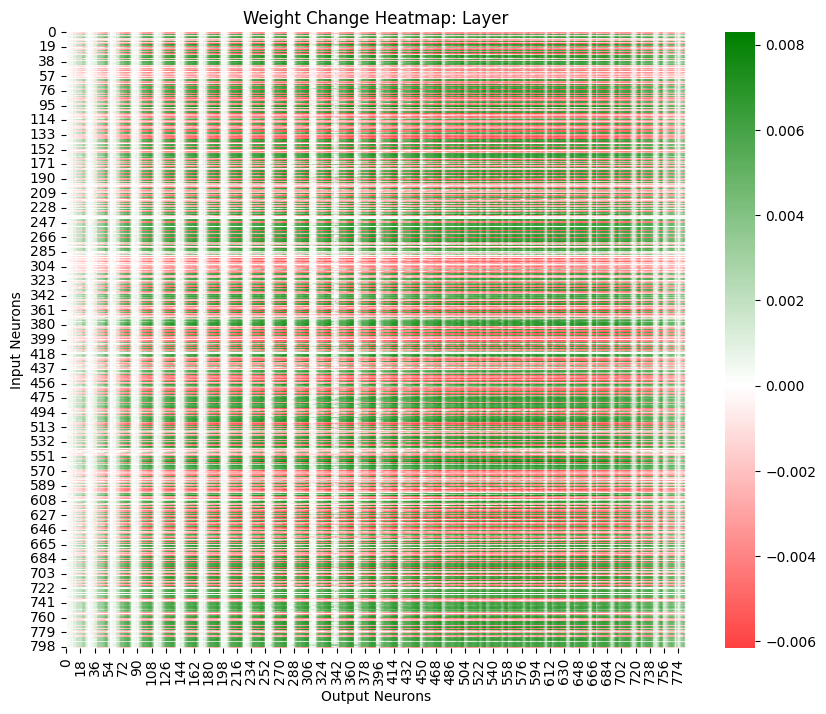

In [63]:
from visualize import visualize_weight_change

visualize_weight_change(weights_before=trained_ms[1].fc1.weight, weights_after=mu_ms[1].fc1.weight)

### Layer-wise Distance

In [64]:
from metrics import model_layer_wise_difference
lw_dist = {}
for t, mu in zip(trained_ms.values(), mu_ms.values()):
    new = model_layer_wise_difference(t, mu)
    if len(lw_dist) == 0:
        for name in new.keys():
            lw_dist[name] = []
    for name in new.keys():
        lw_dist[name].append(new[name])
for key in lw_dist.keys():
    lw_dist[key] = sum(lw_dist[key])/len(lw_dist[key])
lw_dist

{'fc1.weight': 1890.6403401692708,
 'fc1.bias': 3.874804663658142,
 'fc3.weight': 23.59583988189697,
 'fc3.bias': 0.0374042126039664}

### KL-Divergence

Used to compare the difference between distribution, but may also be used to compare models by their predicted target distributions.

In [65]:
from metrics import kl_divergence_between_models, calc_mutlimodel_metric_average
from torch.utils.data import DataLoader

dataloader = DataLoader(
    dataset=unlearned_data,
    batch_size=8,
    shuffle=False,
)

#### Untrained to...

In [66]:
calc_mutlimodel_metric_average(
    modeltype1=untrained_ms,
    modeltype2=trained_ms,
    testing_loader=dataloader,
    metric="kl_div",
)

1.4559672238331176

In [67]:
calc_mutlimodel_metric_average(
    modeltype1=untrained_ms,
    modeltype2=exact_ms,
    testing_loader=dataloader,
    metric="kl_div",
)

1.043307329364905

In [68]:
calc_mutlimodel_metric_average(
    modeltype1=untrained_ms,
    modeltype2=mu_ms,
    testing_loader=dataloader,
    metric="kl_div",
)

2.203887425176091

#### Trained to...

In [69]:
calc_mutlimodel_metric_average(
    modeltype1=trained_ms,
    modeltype2=untrained_ms,
    testing_loader=dataloader,
    metric="kl_div",
)

KL Divergence:   0%|          | 0/263 [00:00<?, ?batch/s]

2.66413293614587

In [70]:
calc_mutlimodel_metric_average(
    modeltype1=trained_ms,
    modeltype2=exact_ms,
    testing_loader=dataloader,
    metric="kl_div",
)

0.677542307406855

In [71]:
calc_mutlimodel_metric_average(
    modeltype1=trained_ms,
    modeltype2=mu_ms,
    testing_loader=dataloader,
    metric="kl_div",
)

2.0487718712089933

#### Exact to ...

In [72]:
calc_mutlimodel_metric_average(
    modeltype1=exact_ms,
    modeltype2=untrained_ms,
    testing_loader=dataloader,
    metric="kl_div",
)

1.8027275272950771

In [73]:
calc_mutlimodel_metric_average(
    modeltype1=exact_ms,
    modeltype2=trained_ms,
    testing_loader=dataloader,
    metric="kl_div",
)

0.6449956072489077

In [74]:
calc_mutlimodel_metric_average(
    modeltype1=exact_ms,
    modeltype2=mu_ms,
    testing_loader=dataloader,
    metric="kl_div",
)

0.8445352032195177

#### MU to...

In [75]:
calc_mutlimodel_metric_average(
    modeltype1=mu_ms,
    modeltype2=untrained_ms,
    testing_loader=dataloader,
    metric="kl_div",
)

6.455736582391012

In [76]:
calc_mutlimodel_metric_average(
    modeltype1=mu_ms,
    modeltype2=trained_ms,
    testing_loader=dataloader,
    metric="kl_div",
)

8.614325737016433

In [77]:
calc_mutlimodel_metric_average(
    modeltype1=mu_ms,
    modeltype2=exact_ms,
    testing_loader=dataloader,
    metric="kl_div",
)

3.8034652543309675

### Accuracy

- $D_{Gesamt}$
- $D_{Erased}$
- $D_{Remain}$
- $D_{Accuracy Per Class}$

In [78]:
from visualize import boxplotting_multimodel_eval

accs = {}

Now, let us see what metrics each model has

Starts evaluation for 'fashion_mnist'...


Average Accuracy for D_gesamt: 0.1962 - Standard Deviation for D_gesamt: 0.0178


Average Accuracy for D_remain: 0.2033 - Standard Deviation for D_remain: 0.0184


Average Accuracy for 0: 0.1473 - Standard Deviation for 0: 0.1138


Average Accuracy for 1: 0.7498 - Standard Deviation for 1: 0.0625


Average Accuracy for 2: 0.0040 - Standard Deviation for 2: 0.0021


Average Accuracy for 3: 0.0340 - Standard Deviation for 3: 0.0528


Average Accuracy for 4: 0.0019 - Standard Deviation for 4: 0.0018


Average Accuracy for 6: 0.0055 - Standard Deviation for 6: 0.0047


Average Accuracy for 7: 0.0184 - Standard Deviation for 7: 0.0183


Average Accuracy for 8: 0.0009 - Standard Deviation for 8: 0.0002


Average Accuracy for 9: 1.0000 - Standard Deviation for 9: 0.0000


Average Accuracy for 5_all: 0.0000 - Standard Deviation for 5_all: 0.0000


Average Accuracy for 5_remain: 0.0000 - Standard Deviation for 5_remain: 0.0000


Average Accuracy for 5_erased: 0.0000 - Standard Deviation for 5_erased: 0.0000
plotting...


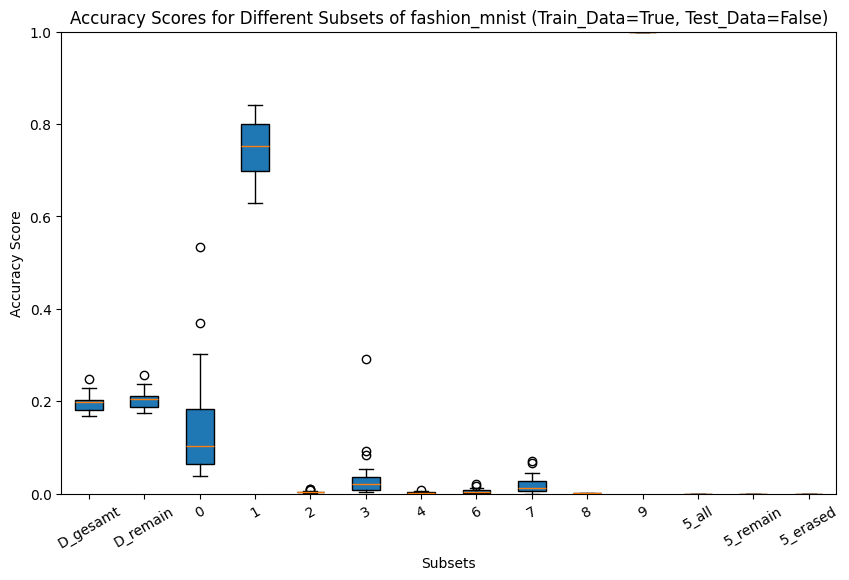

In [79]:
accs["mu_ms_train"] = boxplotting_multimodel_eval(mu_ms, dataset_name=USED_DATASET, evaluation="Accuracy", train_split=True, test_split=False, logs=True)

Starts evaluation for 'fashion_mnist'...


Average Accuracy for D_gesamt: 0.1931 - Standard Deviation for D_gesamt: 0.0173


Average Accuracy for D_remain: 0.2006 - Standard Deviation for D_remain: 0.0180


Average Accuracy for 0: 0.1461 - Standard Deviation for 0: 0.1084


Average Accuracy for 1: 0.7228 - Standard Deviation for 1: 0.0647


Average Accuracy for 2: 0.0001 - Standard Deviation for 2: 0.0004


Average Accuracy for 3: 0.0390 - Standard Deviation for 3: 0.0505


Average Accuracy for 4: 0.0022 - Standard Deviation for 4: 0.0023


Average Accuracy for 6: 0.0025 - Standard Deviation for 6: 0.0038


Average Accuracy for 7: 0.0173 - Standard Deviation for 7: 0.0176


Average Accuracy for 8: 0.0007 - Standard Deviation for 8: 0.0006


Average Accuracy for 9: 1.0000 - Standard Deviation for 9: 0.0000


Average Accuracy for 5_all: 0.0000 - Standard Deviation for 5_all: 0.0000


Average Accuracy for 5_remain: 0.0000 - Standard Deviation for 5_remain: 0.0000


Average Accuracy for 5_erased: 0.0000 - Standard Deviation for 5_erased: 0.0000
plotting...


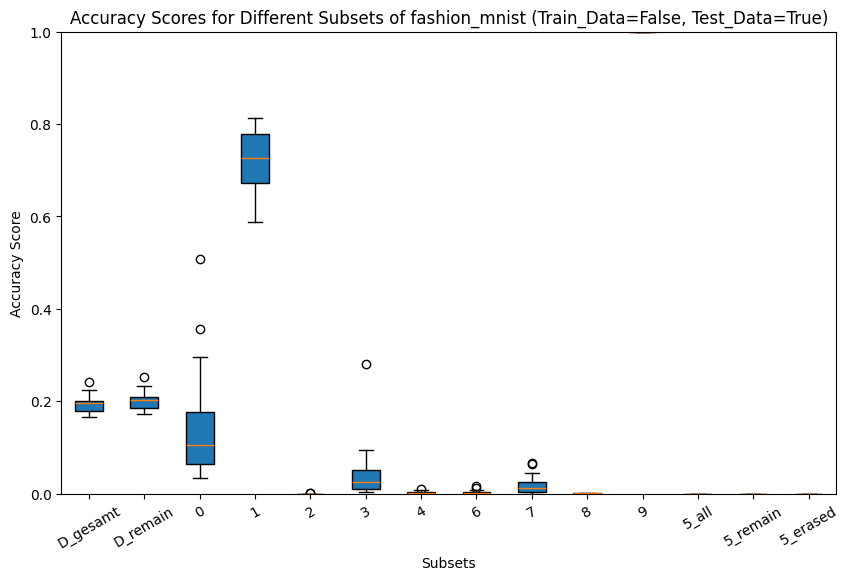

In [80]:
accs["mu_ms_test"] = boxplotting_multimodel_eval(mu_ms, dataset_name=USED_DATASET, evaluation="Accuracy", train_split=False, test_split=True, logs=True)

#### Losses

In [81]:
losses = {}

Starts evaluation for 'fashion_mnist'...


Average Loss for D_gesamt: 0.6516 - Standard Deviation for D_gesamt: 0.0525


Average Loss for D_remain: 0.6023 - Standard Deviation for D_remain: 0.0540


Average Loss for 0: 0.3352 - Standard Deviation for 0: 0.0795


Average Loss for 1: 0.1122 - Standard Deviation for 1: 0.0236


Average Loss for 2: 0.8694 - Standard Deviation for 2: 0.1026


Average Loss for 3: 0.3641 - Standard Deviation for 3: 0.0698


Average Loss for 4: 0.8487 - Standard Deviation for 4: 0.1433


Average Loss for 6: 0.6961 - Standard Deviation for 6: 0.1051


Average Loss for 7: 0.5021 - Standard Deviation for 7: 0.0534


Average Loss for 8: 1.1758 - Standard Deviation for 8: 0.1283


Average Loss for 9: 0.0000 - Standard Deviation for 9: 0.0000


Average Loss for 5_all: 1.6124 - Standard Deviation for 5_all: 0.0301


Average Loss for 5_remain: 1.3975 - Standard Deviation for 5_remain: 0.0273


Average Loss for 5_erased: 2.0179 - Standard Deviation for 5_erased: 0.0367
plotting...


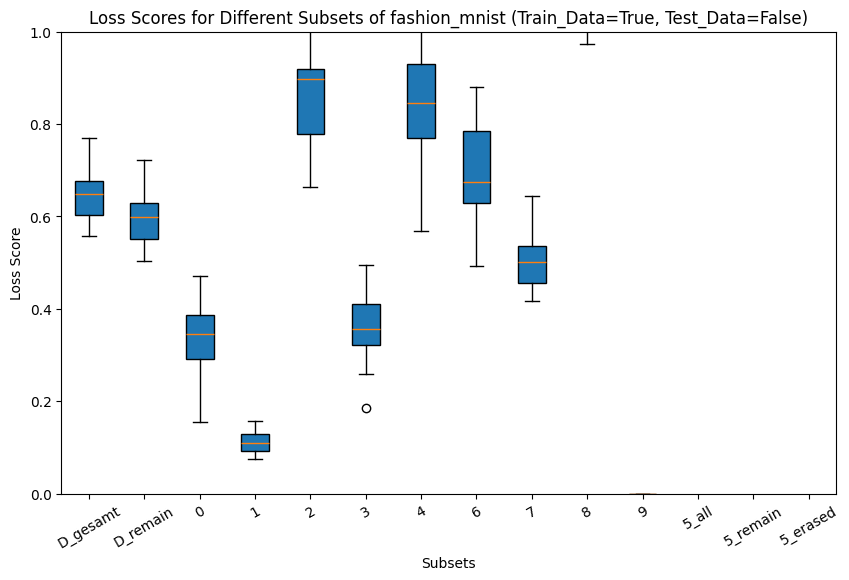

In [82]:
losses["mu_ms_train"] = boxplotting_multimodel_eval(mu_ms, dataset_name=USED_DATASET, evaluation="Loss", train_split=True, test_split=False, logs=True)

In [83]:
losses["mu_ms_test"] = boxplotting_multimodel_eval(mu_ms, dataset_name=USED_DATASET, evaluation="Loss", train_split=False, test_split=True, logs=True)

KeyboardInterrupt: 